<a href="https://colab.research.google.com/github/mazarine720/Iris_app/blob/main/Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris application


##Exploratory Data Analysis

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dataset
iris= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Projects/Iris App/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = iris.drop(columns=['Id'], errors='ignore')

In [ ]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
features = iris.columns[:4].tolist()
target_col = 'Species'

##Visualizations

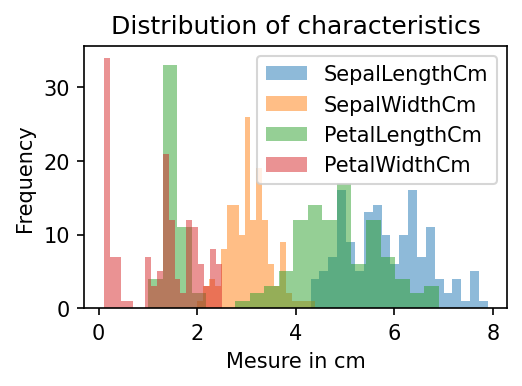

In [ ]:
#Histogram
cols_to_keep=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(8, 5), dpi=150)
plt.subplot(2, 2, 1)
for col in cols_to_keep:
    plt.hist(iris[col], bins=20, alpha=0.5, label=col)

plt.title("Distribution of characteristics")
plt.xlabel("Mesure in cm")
plt.ylabel("Frequency")
plt.legend()

Observations: Petal measurements show a clear bimodal distribution with a significant gap between one group (likely Setosa) from the others. The petal metrics will be the most significant predictor for our machine learning model due to this distribution.

In [ ]:
plt.subplot(2, 2, 2)
plt.boxplot([iris[col] for col in features], labels=features)
plt.xticks(rotation=15)
plt.title("Boxplot of variables")
plt.ylabel("cm")

Observation: Most features are scaled between 0 and 8 cm and SepalWidthCm is the only feature showing a few outliers above 4 cm but we can conclude that the dataset is clean overall. The small number of outliers in Sepal Width is unlikely to negatively impact model performance.

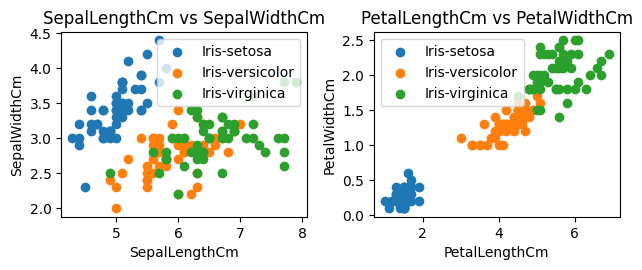

In [ ]:
#Scatter plots
#Sepal
plt.subplot(2, 2, 3)
species_list = iris[target_col].unique()
for s in species_list:
    subset = iris[iris[target_col] == s]
    plt.scatter(subset[features[0]], subset[features[1]], label=s)
plt.title(f"{features[0]} vs {features[1]}")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()

#Petal
plt.subplot(2, 2, 4)
for s in species_list:
    subset = iris[iris[target_col] == s]
    plt.scatter(subset[features[2]], subset[features[3]], label=s)
plt.title(f"{features[2]} vs {features[3]}")
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.legend()

plt.tight_layout()
plt.show()

Observation: There is a strong linear relationship between PetalLengthCm and PetalWidthCm and the Setosa species forms a completely isolated cluster, making it easy to classify.

In [ ]:
#Correlation matrice
corr_matrix = iris[cols_to_corr].corr()
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plt.xticks(range(len(cols_to_corr)), cols_to_corr, rotation=45)
plt.yticks(range(len(cols_to_corr)), cols_to_corr)
for i in range(len(cols_to_corr)):
    for j in range(len(cols_to_corr)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

plt.title("Correlation matrice", fontsize=15)
plt.tight_layout()
plt.show()

Observation: High positive correlation (0.96) between Petal Length and Petal Width, sepal length also correlates strongly with petal measurements and SepalWidthCm stands out with a negative correlation to other features, which is providing unique information to the classifier.